<a href="https://colab.research.google.com/github/Marcelfransz/kemalmarcel/blob/main/AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain transformers bert-score matplotlib faiss-cpu
!pip install -U langchain-community
!pip install pypdf
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (

Pertanyaan tentang Kerusakan: Bagaimana cara agar menjaga AC tetap awet?
Jawaban: pengecekan
komponen oleh teknisi profesional secara berkala
BERTScore Precision: 0.9139
BERTScore Recall: 0.7933
BERTScore F1: 0.8493


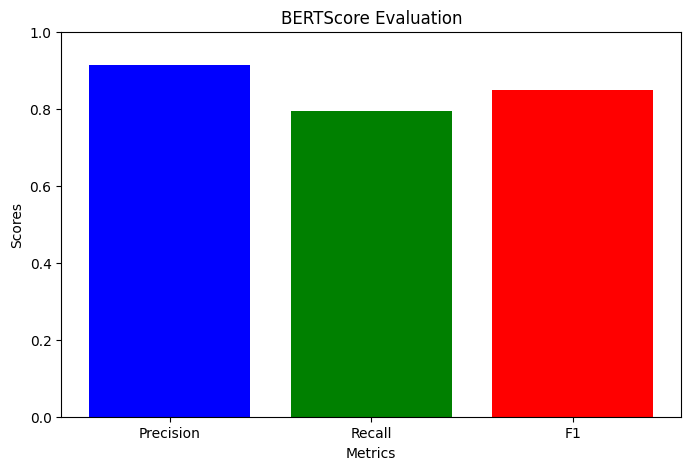

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import FAISS
from transformers import pipeline
from bert_score import score
import matplotlib.pyplot as plt

# Load and split the PDF document
loader = PyPDFLoader("./AC.pdf")
pages = loader.load_and_split()

# Initialize embeddings and FAISS
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db = FAISS.from_documents(pages, embeddings)

# Perform similarity search
query = input("Pertanyaan tentang Kerusakan: ")
docs = db.similarity_search(query)

# Combine the relevant content
content = "\n".join([x.page_content for x in docs])

# Initialize and use the Hugging Face QA model
qa_model = pipeline("question-answering", model="Rifky/Indobert-QA", tokenizer="Rifky/Indobert-QA")
qa_input = {"question": query, "context": content}
result = qa_model(qa_input)
jawaban = result['answer']

# Print the generated answer
print("Jawaban:", jawaban)

# Reference answer (replace this with the correct answer for evaluation)
referensi ="Lakukan perawatan rutin seperti pembersihan filter, pemeriksaan refrigeran, dan pengecekan komponen oleh teknisi profesional secara berkala."

if referensi:
    # Calculate BERTScore
    P, R, F1 = score([jawaban], [referensi], lang="id")

    # Simplify the output to four decimal places
    P_mean = P.mean().item()
    R_mean = R.mean().item()
    F1_mean = F1.mean().item()

    print(f"BERTScore Precision: {P_mean:.4f}")
    print(f"BERTScore Recall: {R_mean:.4f}")
    print(f"BERTScore F1: {F1_mean:.4f}")

    # Plotting the BERTScore results
    scores = [P_mean, R_mean, F1_mean]
    labels = ['Precision', 'Recall', 'F1']

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['blue', 'green', 'red'])
    plt.ylim(0, 1)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('BERTScore Evaluation')
    plt.show()
else:
    print("Tidak ada jawaban referensi yang dimasukkan. Evaluasi BERTScore tidak dilakukan.")

Question 1: Bagaimana cara menjaga AC agar tetap awet?
Generated Answer: pengecekan
komponen oleh teknisi profesional secara berkala
Reference Answer: Lakukan perawatan rutin seperti pembersihan filter, pemeriksaan refrigeran, dan pengecekan komponen oleh teknisi profesional secara berkala.
Precision: 0.9139
Recall: 0.7933
F1: 0.8493

Question 2: Apa yang menyebabkan AC membeku?
Generated Answer: aliran udara yang terhambat, filter yang kotor, atau kekurangan
refrigeran
Reference Answer: AC bisa membeku karena aliran udara yang terhambat, filter yang kotor, atau kekurangan refrigeran.
Precision: 0.9330
Recall: 0.8706
F1: 0.9007

Question 3: Mengapa AC terasa berangin tapi tidak dingin?
Generated Answer: Kemungkinan refrigeran habis atau ada kebocoran pada sistem refrigerasi
Reference Answer: Kemungkinan refrigeran habis atau ada kebocoran pada sistem refrigerasi.
Precision: 0.9649
Recall: 0.9605
F1: 0.9627

Question 4: Kenapa AC tidak bisa diatur suhunya?
Generated Answer: kerusakan pa

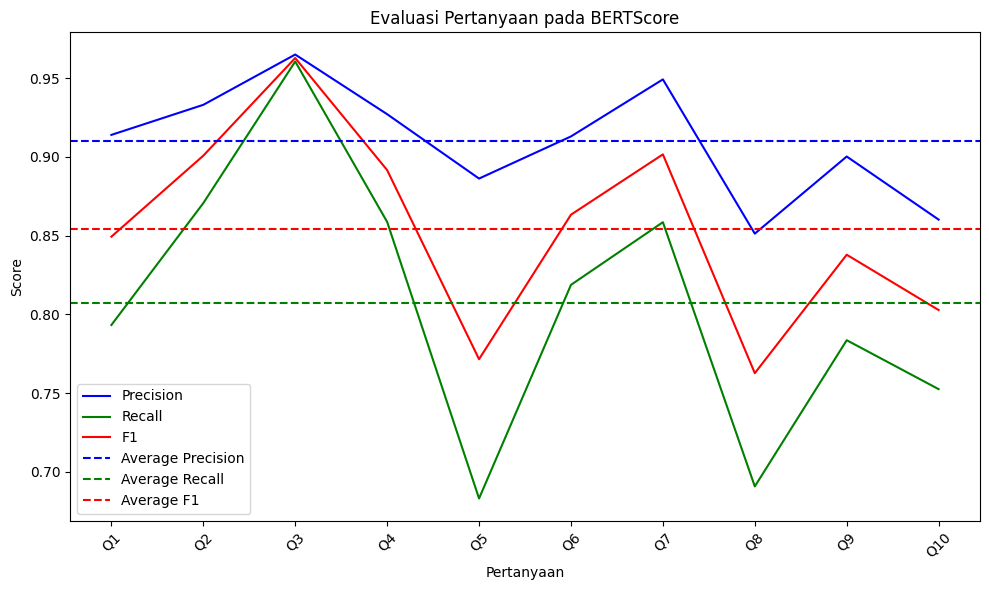

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import FAISS
from transformers import pipeline
from bert_score import score
import matplotlib.pyplot as plt

# Load and split the PDF document
loader = PyPDFLoader("./AC.pdf")
pages = loader.load_and_split()

# Initialize embeddings and FAISS
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db = FAISS.from_documents(pages, embeddings)

# Initialize the Hugging Face QA model
qa_model = pipeline("question-answering", model="Rifky/Indobert-QA", tokenizer="Rifky/Indobert-QA")

# Questions and reference answers (replace with your actual questions and answers)
questions = [
    "Bagaimana cara menjaga AC agar tetap awet?",
    "Apa yang menyebabkan AC membeku?",
    "Mengapa AC terasa berangin tapi tidak dingin?",
    "Kenapa AC tidak bisa diatur suhunya?",
    "Mengapa AC sering mati sendiri setelah beberapa menit?",
    "Mengapa AC saya berisik?",
    "Kenapa AC mengeluarkan suara mendengung?",
    "Mengapa kipas AC tidak berputar?",
    "Apa penyebab AC mengeluarkan bau tidak sedap?",
    "Bagaimana cara membersihkan filter AC?"
]

reference_answers = [
    "Lakukan perawatan rutin seperti pembersihan filter, pemeriksaan refrigeran, dan pengecekan komponen oleh teknisi profesional secara berkala.",
    "AC bisa membeku karena aliran udara yang terhambat, filter yang kotor, atau kekurangan refrigeran.",
    "Kemungkinan refrigeran habis atau ada kebocoran pada sistem refrigerasi.",
    "Bisa jadi karena kerusakan pada thermostat atau masalah pada sensor suhu.",
    "Hal ini bisa disebabkan oleh overheating, masalah pada thermostat, atau proteksi otomatis karena tekanan refrigeran yang tidak stabil.",
    "Kebisingan pada AC dapat disebabkan oleh berbagai faktor seperti kipas yang kotor, bagian yang longgar, atau kerusakan pada kompresor.",
    "Suara mendengung dapat disebabkan oleh masalah pada motor kipas atau kompresor yang bermasalah",
    "Penyebabnya bisa karena motor kipas yang rusak, kapasitor yang lemah, atau adanya hambatan pada baling-baling kipas.",
    "Bau tidak sedap bisa disebabkan oleh penumpukan bakteri atau jamur di dalam unit AC.",
    "Lepaskan filter dari unit AC, bersihkan dengan air sabun hangat, keringkan sepenuhnya sebelum dipasang kembali."
]

precision_scores = []
recall_scores = []
f1_scores = []

for i, (query, reference_answer) in enumerate(zip(questions, reference_answers)):
    # Perform similarity search
    docs = db.similarity_search(query)

    # Combine the relevant content
    content = "\n".join([x.page_content for x in docs])

    # Get the generated answer
    qa_input = {"question": query, "context": content}
    result = qa_model(qa_input)
    generated_answer = result['answer']

    # Calculate BERTScore
    P, R, F1 = score([generated_answer], [reference_answer], lang="id")

    # Append scores to the lists
    precision_scores.append(P.mean().item())
    recall_scores.append(R.mean().item())
    f1_scores.append(F1.mean().item())

    # Print BERTScore for the current question
    print(f"Question {i+1}: {query}")
    print(f"Generated Answer: {generated_answer}")
    print(f"Reference Answer: {reference_answer}")
    print(f"Precision: {P.mean().item():.4f}")
    print(f"Recall: {R.mean().item():.4f}")
    print(f"F1: {F1.mean().item():.4f}")
    print()

# Calculate and print average scores
average_precision = sum(precision_scores) / len(precision_scores)
average_recall = sum(recall_scores) / len(recall_scores)
average_f1 = sum(f1_scores) / len(f1_scores)

print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1: {average_f1:.4f}")

# Plotting the BERTScore results per question
questions_range = range(1, len(questions) + 1)

plt.figure(figsize=(10, 6))
plt.plot(questions_range, precision_scores, label='Precision', color='blue')
plt.plot(questions_range, recall_scores, label='Recall', color='green')
plt.plot(questions_range, f1_scores, label='F1', color='red')

# Calculate and plot the average scores as horizontal lines
plt.axhline(y=average_precision, color='blue', linestyle='--', label='Average Precision')
plt.axhline(y=average_recall, color='green', linestyle='--', label='Average Recall')
plt.axhline(y=average_f1, color='red', linestyle='--', label='Average F1')

# Adding question labels
plt.xticks(questions_range, [f"Q{i+1}" for i in range(len(questions))], rotation=45)

plt.xlabel('Pertanyaan')
plt.ylabel('Score')
plt.title('Evaluasi Pertanyaan pada BERTScore')
plt.legend()
plt.tight_layout()
plt.show()
